# 1.1 Aquisição e leitura de dados
Utilizaremos dados do DataSUS, disponíveis pelo Tabnet.

In [451]:
import pandas as pd

In [452]:
url = "../dados/nomes-atendimento-UF.csv"
df_atendimento = pd.read_csv(url, encoding="ISO-8859-1",sep=";",skiprows=3,skipfooter=12, thousands=".", decimal=",")

D:\Temp\ipykernel_5740\3917277595.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_atendimento = pd.read_csv(url, encoding="ISO-8859-1",sep=";",skiprows=3,skipfooter=12, thousands=".", decimal=",")


In [453]:
url = "../dados/nomes-processamento-UF.csv"
df_processamento = pd.read_csv(url, encoding="ISO-8859-1",sep=";",skiprows=3,skipfooter=12, thousands=".", decimal=",")

D:\Temp\ipykernel_5740\2680120960.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_processamento = pd.read_csv(url, encoding="ISO-8859-1",sep=";",skiprows=3,skipfooter=12, thousands=".", decimal=",")


In [454]:
df_atendimento.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,14245430.08,13513718.18,15768573.38,14703987.50,14150716.10,13560840.74,9139104.31,6519383.53,2758684.28,1560284917.23
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4988565.96,5264769.94,5030037.73,5142268.22,4684727.01,4602457.27,3925559.35,1415201.09,-,646620087.26
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,23374512.69,22127422.45,23608720.40,24321472.24,23723027.50,23091729.84,18975268.18,15476800.24,6664235.65,2888132298.30
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3366624.22,3363751.20,3329894.41,2951150.34,2368791.93,1054670.97,787381.40,6307.79,-,489970130.16
4,15 Pará,-,-,-,-,-,-,-,-,-,...,56654098.57,52473874.98,55425739.44,53526292.16,57356780.09,58202601.03,47314110.27,35595477.64,14861885.10,6983761195.26


In [455]:
df_atendimento.mean(numeric_only=True)

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2024/Set     75209576.23
2024/Out     75604913.79
2024/Nov     62585781.04
2024/Dez     50022867.39
Total      9460731715.38
Length: 210, dtype: float64

In [456]:
df_atendimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 333 entries, Unidade da Federação to Total
dtypes: float64(210), object(123)
memory usage: 70.4+ KB


Reformatando a saída de números para uma melhor compreensão

In [457]:
pd.options.display.float_format = '{:.2f}'.format

In [458]:
df_atendimento.mean(numeric_only=True)

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2024/Set     75209576.23
2024/Out     75604913.79
2024/Nov     62585781.04
2024/Dez     50022867.39
Total      9460731715.38
Length: 210, dtype: float64

## Desafio
Mostre apenas a coluna mais recente.

In [459]:
df_atendimento.iloc[:,-2]

0       2758684.28
1                -
2       6664235.65
3                -
4      14861885.10
5       1870008.23
6       2558853.91
7      14167784.17
8       8661345.49
9      20466478.61
10     10695236.55
11     22181612.79
12     53183496.03
13      5867825.94
14      2897390.57
15     35121217.44
16     97869146.78
17     18367566.70
18     37940675.61
19    210480831.49
20     69078550.67
21     41423167.08
22     35442563.64
23      3611400.51
24      8479123.04
25     25809563.12
26     16764896.04
Name: 2025/Jan, dtype: object

# 1.2 Primeiras visualizações de dados

In [460]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

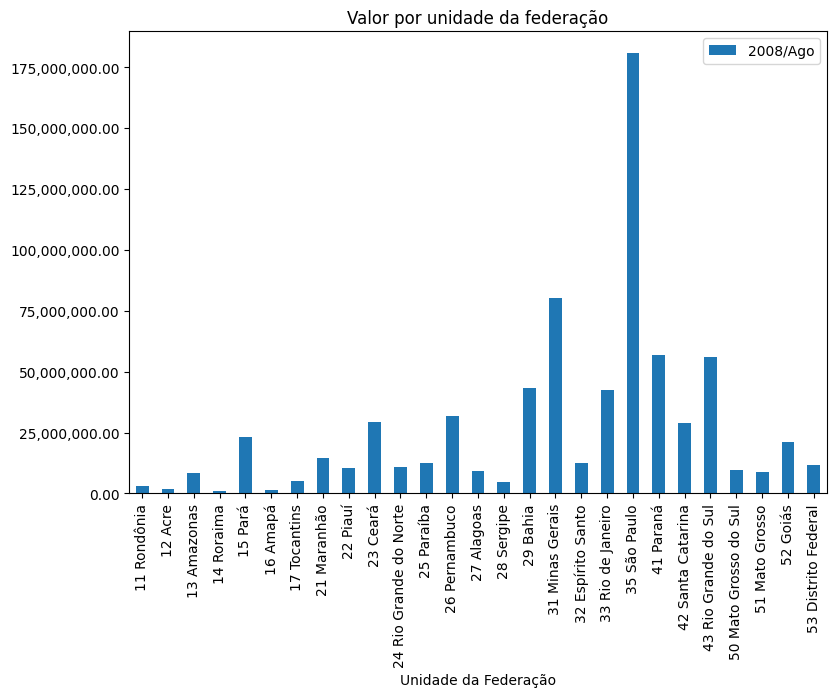

In [461]:
axis = df_atendimento.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(9,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor por unidade da federação")
plt.show()


## Desafios
### 1. Deixar as legendas anguladas para facilitar a leitura
### 2. Fazer um gráfico como o acima para o mês mais recente.

Completaremos os dois abaixo.

In [462]:
coluna_recente = df_atendimento.columns[-2]
coluna_recente

'2025/Jan'

In [463]:
import numpy as np

In [464]:
df_atendimento[coluna_recente] = df_atendimento[coluna_recente].replace('-', np.nan).astype(float)
df_atendimento[coluna_recente]

0      2758684.28
1             NaN
2      6664235.65
3             NaN
4     14861885.10
5      1870008.23
6      2558853.91
7     14167784.17
8      8661345.49
9     20466478.61
10    10695236.55
11    22181612.79
12    53183496.03
13     5867825.94
14     2897390.57
15    35121217.44
16    97869146.78
17    18367566.70
18    37940675.61
19   210480831.49
20    69078550.67
21    41423167.08
22    35442563.64
23     3611400.51
24     8479123.04
25    25809563.12
26    16764896.04
Name: 2025/Jan, dtype: float64

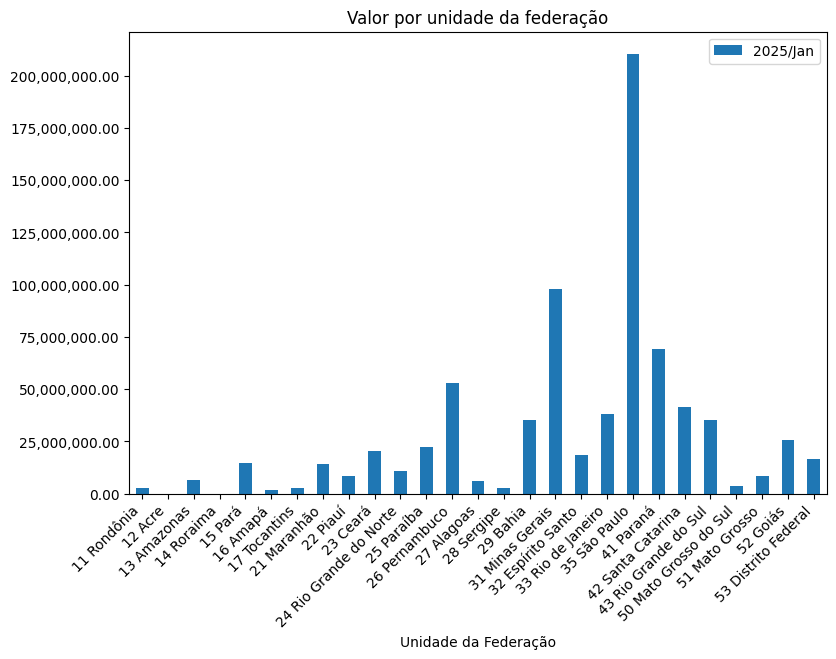

In [465]:
axis = df_atendimento.plot(x="Unidade da Federação", y=coluna_recente, kind="bar", figsize=(9,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xticks(rotation=45, ha='right')

plt.title("Valor por unidade da federação")
plt.show()

# 1.3 Manipulação de dados

Demonstração de como selecionar múltiplas colunas:

In [466]:
df_atendimento[['2008/Ago','2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


Quero agora selecionar coluna **apenas quando temos dados para TODAS as UFs**.
.mean() nos retorna dados APENAS quando todas estão preenchidas.

In [467]:
colunas_preenchidas = df_atendimento.mean(numeric_only=True).index.tolist()
colunas_preenchidas.insert(0,'Unidade da Federação')
colunas_preenchidas

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [468]:
df_atendimento_preenchido = df_atendimento[colunas_preenchidas]
df_atendimento_preenchido

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,14245430.08,13513718.18,15768573.38,14703987.50,14150716.10,13560840.74,9139104.31,6519383.53,2758684.28,1560284917.23
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4988565.96,5264769.94,5030037.73,5142268.22,4684727.01,4602457.27,3925559.35,1415201.09,NaN,646620087.26
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,23374512.69,22127422.45,23608720.40,24321472.24,23723027.50,23091729.84,18975268.18,15476800.24,6664235.65,2888132298.30
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3366624.22,3363751.20,3329894.41,2951150.34,2368791.93,1054670.97,787381.40,6307.79,NaN,489970130.16
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,56654098.57,52473874.98,55425739.44,53526292.16,57356780.09,58202601.03,47314110.27,35595477.64,14861885.10,6983761195.26
5,16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,...,4347577.72,4184142.89,4366717.71,4211396.18,4195741.10,4336396.75,3794028.79,3511515.03,1870008.23,483661602.42
6,17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,...,10660212.82,10122537.86,9978443.16,10251688.37,10114640.44,9345504.78,6318575.89,4795457.30,2558853.91,1492979261.92
7,21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,...,45361942.72,43460938.56,45026340.52,45981402.90,45600967.69,43609705.31,36114501.96,28645837.82,14167784.17,5779843412.44
8,22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,...,24061124.87,23740543.17,24744959.75,23776351.93,23587479.21,21865890.66,17369877.05,14158169.45,8661345.49,3329911635.55
9,23 Ceará,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,...,72736761.84,71732651.70,74686499.30,74045054.57,73438447.34,72394759.41,61006623.97,46506146.12,20466478.61,9709334950.21


In [469]:
df_atendimento_preenchido = df_atendimento_preenchido.set_index('Unidade da Federação')
df_atendimento_preenchido

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,14245430.08,13513718.18,15768573.38,14703987.50,14150716.10,13560840.74,9139104.31,6519383.53,2758684.28,1560284917.23
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4988565.96,5264769.94,5030037.73,5142268.22,4684727.01,4602457.27,3925559.35,1415201.09,NaN,646620087.26
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,23374512.69,22127422.45,23608720.40,24321472.24,23723027.50,23091729.84,18975268.18,15476800.24,6664235.65,2888132298.30
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3366624.22,3363751.20,3329894.41,2951150.34,2368791.93,1054670.97,787381.40,6307.79,NaN,489970130.16
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,56654098.57,52473874.98,55425739.44,53526292.16,57356780.09,58202601.03,47314110.27,35595477.64,14861885.10,6983761195.26
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,4347577.72,4184142.89,4366717.71,4211396.18,4195741.10,4336396.75,3794028.79,3511515.03,1870008.23,483661602.42
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,10660212.82,10122537.86,9978443.16,10251688.37,10114640.44,9345504.78,6318575.89,4795457.30,2558853.91,1492979261.92
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,45361942.72,43460938.56,45026340.52,45981402.90,45600967.69,43609705.31,36114501.96,28645837.82,14167784.17,5779843412.44
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,24061124.87,23740543.17,24744959.75,23776351.93,23587479.21,21865890.66,17369877.05,14158169.45,8661345.49,3329911635.55


Com o index sendo igual a UF, agora podemos ver os dados com mais claridade quando selecionamos uma coluna.

In [470]:
df_atendimento_preenchido['2010/Ago'].head()

Unidade da Federação
11 Rondônia    4464307.47
12 Acre        2454599.37
13 Amazonas    9437224.41
14 Roraima     2046063.98
15 Pará       27761867.94
Name: 2010/Ago, dtype: float64

In [471]:
df_atendimento_preenchido.loc["12 Acre"] # procurando pelo index

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2024/Out     4602457.27
2024/Nov     3925559.35
2024/Dez     1415201.09
2025/Jan            NaN
Total      646620087.26
Name: 12 Acre, Length: 211, dtype: float64

In [472]:
df_atendimento_preenchido.iloc[1] # procurando pelo contador de linha

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2024/Out     4602457.27
2024/Nov     3925559.35
2024/Dez     1415201.09
2025/Jan            NaN
Total      646620087.26
Name: 12 Acre, Length: 211, dtype: float64

## Começando a organizar o gráfico

In [473]:
df_atendimento_preenchido.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


<Axes: >

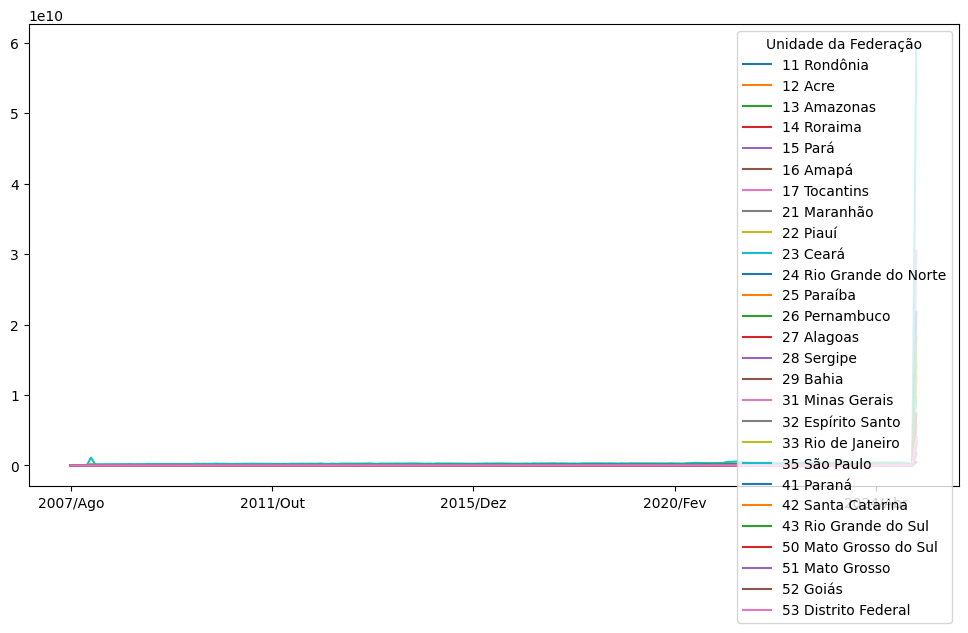

In [474]:
df_atendimento_preenchido.T.plot(figsize=(12,6))

No final do DF temos o total, que está distorcendo o gráfico.

In [475]:
df_atendimento_preenchido.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2024/Out,13560840.74,4602457.27,23091729.84,1054670.97,58202601.03,4336396.75,9345504.78,43609705.31,21865890.66,72394759.41,...,46194205.41,142773517.13,447928600.94,171103139.87,135751413.24,132437000.00,25743057.05,26850694.38,49652238.35,32528006.84
2024/Nov,9139104.31,3925559.35,18975268.18,787381.40,47314110.27,3794028.79,6318575.89,36114501.96,17369877.05,61006623.97,...,38788116.33,109522394.10,387444440.51,139925364.31,114417047.85,103583124.61,18186248.86,20561114.34,44973037.35,29245003.46
2024/Dez,6519383.53,1415201.09,15476800.24,6307.79,35595477.64,3511515.03,4795457.30,28645837.82,14158169.45,46506146.12,...,33006426.70,85513544.90,324445311.14,115211619.99,82458534.29,74462448.83,12339588.67,15602957.81,39851862.13,24483952.98
2025/Jan,2758684.28,NaN,6664235.65,NaN,14861885.10,1870008.23,2558853.91,14167784.17,8661345.49,20466478.61,...,18367566.70,37940675.61,210480831.49,69078550.67,41423167.08,35442563.64,3611400.51,8479123.04,25809563.12,16764896.04
Total,1560284917.23,646620087.26,2888132298.30,489970130.16,6983761195.26,483661602.42,1492979261.92,5779843412.44,3329911635.55,9709334950.21,...,5321814286.42,15932166132.66,59610430175.39,21797575319.52,12284661079.47,18241384664.44,3553457995.83,3308268753.12,7343470595.15,3935843165.77


In [476]:
df_atendimento_preenchido = df_atendimento_preenchido.drop('Total', axis=1)
df_atendimento_preenchido.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2024/Set,14150716.10,4684727.01,23723027.50,2368791.93,57356780.09,4195741.10,10114640.44,45600967.69,23587479.21,73438447.34,...,45950101.54,138174217.97,433154845.88,170071507.23,128810577.51,126549202.91,27540863.66,26996002.44,50808426.77,32469797.15
2024/Out,13560840.74,4602457.27,23091729.84,1054670.97,58202601.03,4336396.75,9345504.78,43609705.31,21865890.66,72394759.41,...,46194205.41,142773517.13,447928600.94,171103139.87,135751413.24,132437000.00,25743057.05,26850694.38,49652238.35,32528006.84
2024/Nov,9139104.31,3925559.35,18975268.18,787381.40,47314110.27,3794028.79,6318575.89,36114501.96,17369877.05,61006623.97,...,38788116.33,109522394.10,387444440.51,139925364.31,114417047.85,103583124.61,18186248.86,20561114.34,44973037.35,29245003.46
2024/Dez,6519383.53,1415201.09,15476800.24,6307.79,35595477.64,3511515.03,4795457.30,28645837.82,14158169.45,46506146.12,...,33006426.70,85513544.90,324445311.14,115211619.99,82458534.29,74462448.83,12339588.67,15602957.81,39851862.13,24483952.98
2025/Jan,2758684.28,NaN,6664235.65,NaN,14861885.10,1870008.23,2558853.91,14167784.17,8661345.49,20466478.61,...,18367566.70,37940675.61,210480831.49,69078550.67,41423167.08,35442563.64,3611400.51,8479123.04,25809563.12,16764896.04


<Axes: >

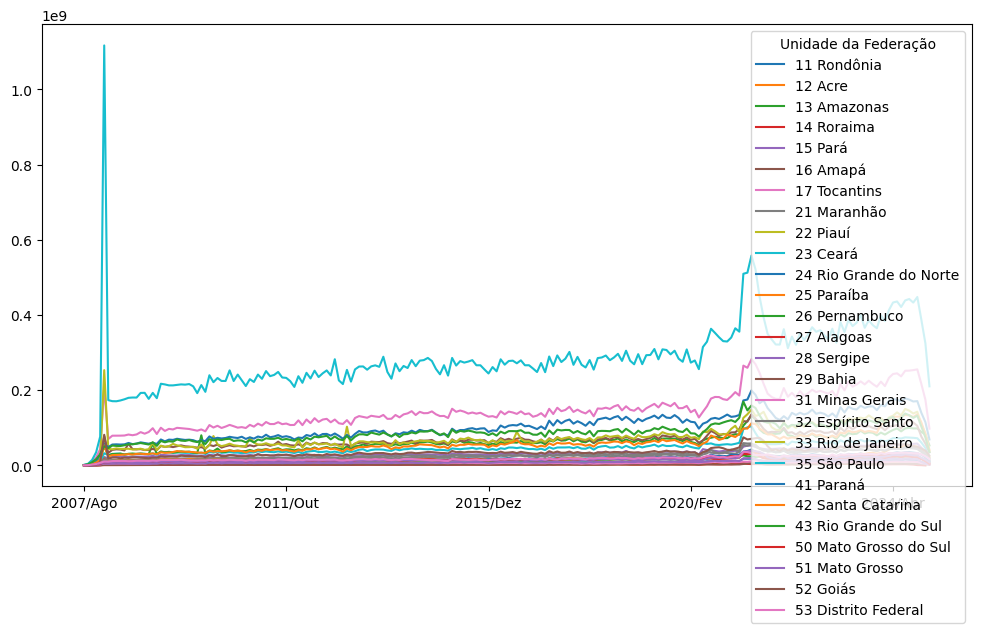

In [477]:
df_atendimento_preenchido.T.plot(figsize=(12,6))

## Desafios
1. Reposicionar a legenda
2. Retocar o título (colocar título nos eixos, etc)

Text(0, 0.5, 'Quantidade de atendimentos (bi)')

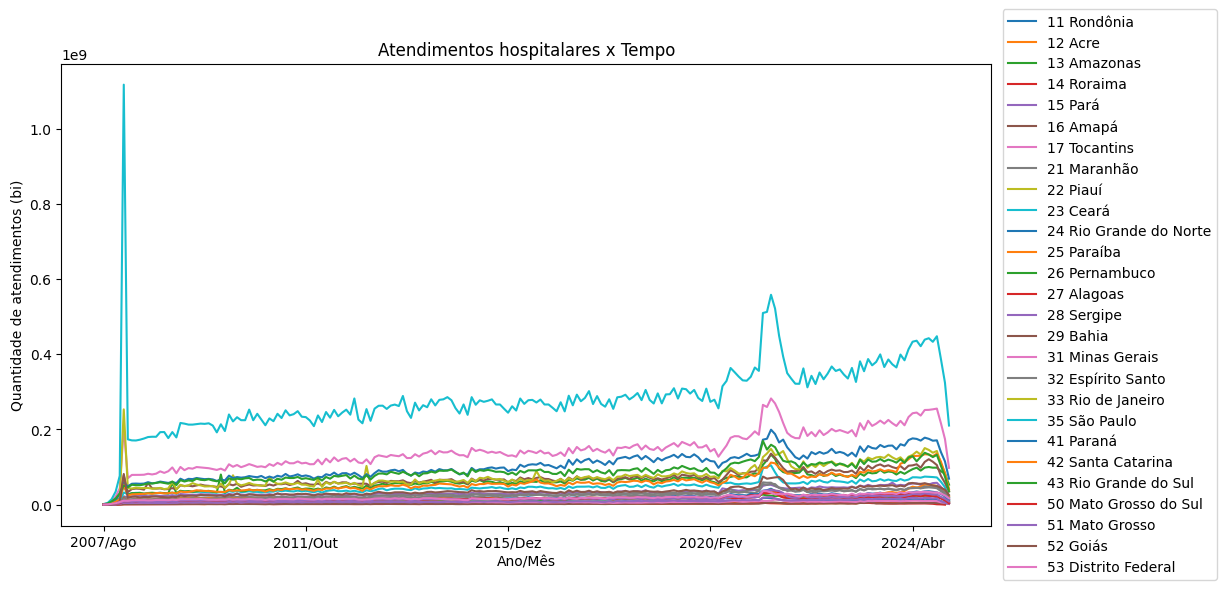

In [478]:
f = plt.figure()

plt.title('Atendimentos hospitalares x Tempo')
df_atendimento_preenchido.T.plot(figsize=(12,6),ax=f.gca())
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5))
plt.xlabel('Ano/Mês')
plt.ylabel('Quantidade de atendimentos (bi)')

## Polindo o gráfico

O gráfico atual não está muito legível. Vamos separar os estados para arrumar isso:

In [479]:
df_atendimento_preenchido.T.columns[:7]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins'],
      dtype='object', name='Unidade da Federação')

Text(0, 0.5, 'Quantidade de atendimentos (bi)')

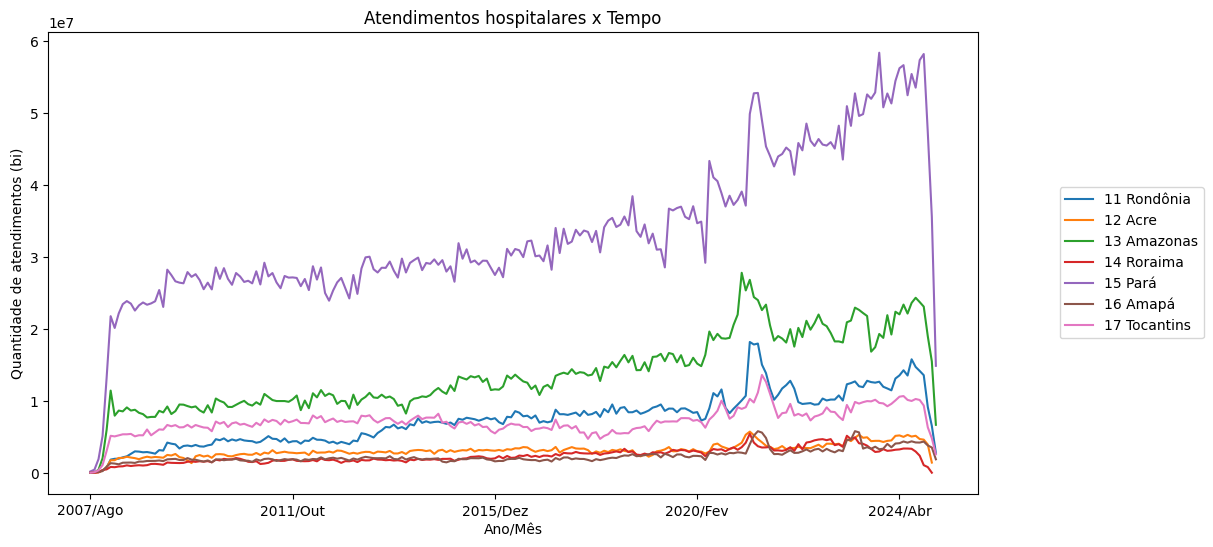

In [480]:
f = plt.figure()

plt.title('Atendimentos hospitalares x Tempo')
df_atendimento_preenchido[:7].T.plot(figsize=(12,6),ax=f.gca())
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5))
plt.xlabel('Ano/Mês')
plt.ylabel('Quantidade de atendimentos (bi)')

In [481]:
df_atendimento_preenchido.sample(n=7) # retorna 7 dados aleatórios 

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2024/Abr,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,128990916.28,115231147.55,127186001.87,138062158.10,133416334.10,126549202.91,132437000.00,103583124.61,74462448.83,35442563.64
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,22015071.23,23374512.69,22127422.45,23608720.40,24321472.24,23723027.50,23091729.84,18975268.18,15476800.24,6664235.65
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206939042.57,70301089.50,79119005.51,79046322.41,79268070.12,...,243167065.29,244960064.49,236957360.17,251811448.64,252154347.59,253554464.99,255511700.85,216701546.87,174586144.37,97869146.78
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1116998513.86,173693591.16,170948652.27,170668406.20,172810306.39,...,433371023.39,436069689.24,421454688.19,438894050.45,442651475.53,433154845.88,447928600.94,387444440.51,324445311.14,210480831.49
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,...,32938435.98,34982666.19,33259933.22,35170605.54,35720763.92,34123828.27,32685051.00,28560280.82,21808086.54,10695236.55
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3242788.00,3366624.22,3363751.20,3329894.41,2951150.34,2368791.93,1054670.97,787381.40,6307.79,NaN
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,10572362.58,10660212.82,10122537.86,9978443.16,10251688.37,10114640.44,9345504.78,6318575.89,4795457.30,2558853.91


Text(0, 0.5, 'Quantidade de atendimentos (bi)')

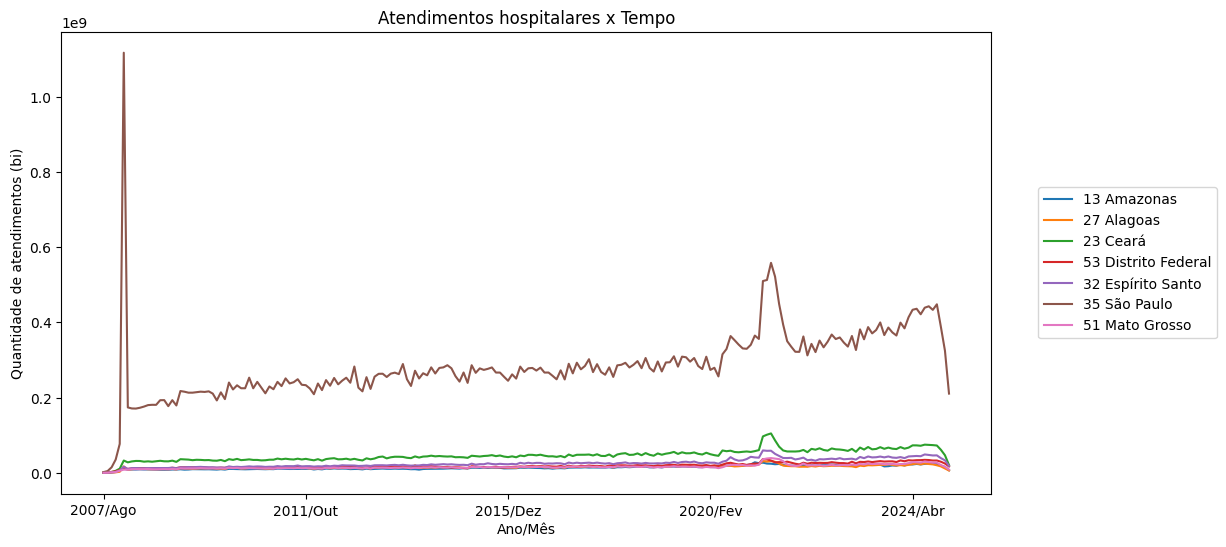

In [482]:
f = plt.figure()

plt.title('Atendimentos hospitalares x Tempo')
df_atendimento_preenchido.sample(n=7).T.plot(figsize=(12,6),ax=f.gca())
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5))
plt.xlabel('Ano/Mês')
plt.ylabel('Quantidade de atendimentos (bi)')

## Algoritmos de aleatoriedade

In [483]:
import numpy as np

In [484]:
np.random.seed(524387)
df_7_estados = df_atendimento_preenchido.sample(n=7)

Text(0, 0.5, 'Quantidade de atendimentos (bi)')

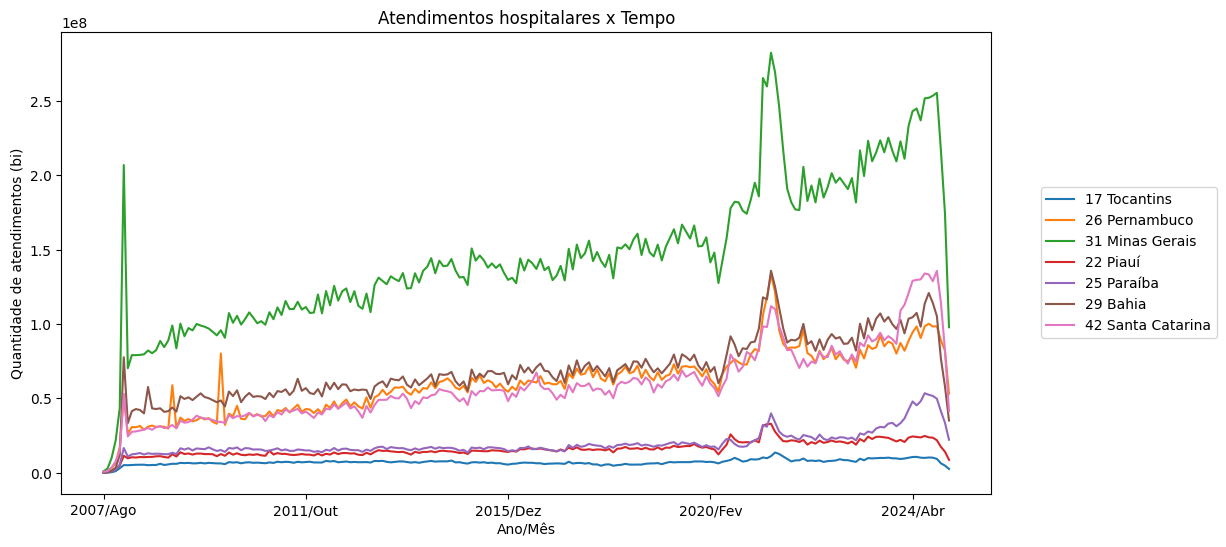

In [485]:
f = plt.figure()

plt.title('Atendimentos hospitalares x Tempo')
df_7_estados.T.plot(figsize=(12,6),ax=f.gca())
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5))
plt.xlabel('Ano/Mês')
plt.ylabel('Quantidade de atendimentos (bi)')

In [486]:
df_atendimento_preenchido['Total'] = df_atendimento_preenchido.sum(axis=1)
df_atendimento_preenchido.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,14245430.08,13513718.18,15768573.38,14703987.50,14150716.10,13560840.74,9139104.31,6519383.53,2758684.28,1560284312.90
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4988565.96,5264769.94,5030037.73,5142268.22,4684727.01,4602457.27,3925559.35,1415201.09,NaN,646618803.44
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,23374512.69,22127422.45,23608720.40,24321472.24,23723027.50,23091729.84,18975268.18,15476800.24,6664235.65,2888129466.89
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3366624.22,3363751.20,3329894.41,2951150.34,2368791.93,1054670.97,787381.40,6307.79,NaN,489969716.47
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,56654098.57,52473874.98,55425739.44,53526292.16,57356780.09,58202601.03,47314110.27,35595477.64,14861885.10,6983742659.66


## Desafios
1. Ordenar DF de maneira descendente pelo total de atendimentos
2. Adicionar uma coluna com a região (Norte, Nordeste, Centro-Oeste, Sudeste, Sul)
3. Adicione seu estado nessa lista de 7 estados

In [487]:
df_atendimento_preenchido.sort_values(by='Total',ascending=False)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1116998513.86,173693591.16,170948652.27,170668406.20,172810306.39,...,436069689.24,421454688.19,438894050.45,442651475.53,433154845.88,447928600.94,387444440.51,324445311.14,210480831.49,59600554857.89
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206939042.57,70301089.50,79119005.51,79046322.41,79268070.12,...,244960064.49,236957360.17,251811448.64,252154347.59,253554464.99,255511700.85,216701546.87,174586144.37,97869146.78,30491680029.60
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,174915202.86,170382762.42,178236707.18,175094304.44,170071507.23,171103139.87,139925364.31,115211619.99,69078550.67,21797402089.01
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,115231147.55,127186001.87,138062158.10,133416334.10,126549202.91,132437000.00,103583124.61,74462448.83,35442563.64,18241267927.47
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,253437962.44,44128159.73,42933765.97,45324789.60,43951349.46,...,141062368.77,133167651.81,150484575.82,145672612.54,138174217.97,142773517.13,109522394.10,85513544.90,37940675.61,15932005589.75
29 Bahia,135146.36,448349.75,1382038.11,3348779.62,11948984.56,77652692.45,33410124.06,41416056.79,42826993.62,42185290.32,...,107495266.28,98199595.69,113784746.89,120866848.43,114186674.58,105336530.32,76709673.21,58097406.80,35121217.44,14376635757.14
26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51279301.86,26222079.10,30716361.81,30589332.79,31424612.72,...,98389149.72,90630116.99,98505453.94,100191806.00,98357436.48,98490779.00,89017887.66,82219989.16,53183496.03,12686265263.54
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,...,129727378.72,130031667.22,134039157.80,133350080.99,128810577.51,135751413.24,114417047.85,82458534.29,41423167.08,12284521970.45
23 Ceará,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,31189904.62,...,72736761.84,71732651.70,74686499.30,74045054.57,73438447.34,72394759.41,61006623.97,46506146.12,20466478.61,9709323635.86


In [488]:
estados_regioes = {k:'Norte' for k in ['Amazonas','Pará','Roraima','Amapá','Rondônia','Acre','Tocantins']}
estados_regioes.update({k:'Nordeste' for k in ['Piauí','Maranhão','Pernambuco','Rio Grande do Norte','Paraíba','Ceará','Bahia','Alagoas','Sergipe']})
estados_regioes.update({k:'Centro-Oeste' for k in ['Mato Grosso', 'Mato Grosso do Sul', 'Goiás','Distrito Federal']})
estados_regioes.update({k:'Sudeste' for k in ['São Paulo', 'Rio de Janeiro', 'Espírito Santo', 'Minas Gerais']})
estados_regioes.update({k:'Sul' for k in ['Rio Grande do Sul', 'Paraná', 'Santa Catarina']})


estados_regioes

{'Amazonas': 'Norte',
 'Pará': 'Norte',
 'Roraima': 'Norte',
 'Amapá': 'Norte',
 'Rondônia': 'Norte',
 'Acre': 'Norte',
 'Tocantins': 'Norte',
 'Piauí': 'Nordeste',
 'Maranhão': 'Nordeste',
 'Pernambuco': 'Nordeste',
 'Rio Grande do Norte': 'Nordeste',
 'Paraíba': 'Nordeste',
 'Ceará': 'Nordeste',
 'Bahia': 'Nordeste',
 'Alagoas': 'Nordeste',
 'Sergipe': 'Nordeste',
 'Mato Grosso': 'Centro-Oeste',
 'Mato Grosso do Sul': 'Centro-Oeste',
 'Goiás': 'Centro-Oeste',
 'Distrito Federal': 'Centro-Oeste',
 'São Paulo': 'Sudeste',
 'Rio de Janeiro': 'Sudeste',
 'Espírito Santo': 'Sudeste',
 'Minas Gerais': 'Sudeste',
 'Rio Grande do Sul': 'Sul',
 'Paraná': 'Sul',
 'Santa Catarina': 'Sul'}

In [489]:
import re
lista_estados = [re.sub('[0-9]','',x).strip() for x in df_atendimento_preenchido.index.values]

In [490]:
df_atendimento_preenchido.insert(0, 'Região', [estados_regioes[estado] for estado in lista_estados])

In [491]:
df_atendimento_preenchido

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,Norte,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,14245430.08,13513718.18,15768573.38,14703987.50,14150716.10,13560840.74,9139104.31,6519383.53,2758684.28,1560284312.90
12 Acre,Norte,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4988565.96,5264769.94,5030037.73,5142268.22,4684727.01,4602457.27,3925559.35,1415201.09,NaN,646618803.44
13 Amazonas,Norte,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,23374512.69,22127422.45,23608720.40,24321472.24,23723027.50,23091729.84,18975268.18,15476800.24,6664235.65,2888129466.89
14 Roraima,Norte,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3366624.22,3363751.20,3329894.41,2951150.34,2368791.93,1054670.97,787381.40,6307.79,NaN,489969716.47
15 Pará,Norte,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,56654098.57,52473874.98,55425739.44,53526292.16,57356780.09,58202601.03,47314110.27,35595477.64,14861885.10,6983742659.66
16 Amapá,Norte,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,...,4347577.72,4184142.89,4366717.71,4211396.18,4195741.10,4336396.75,3794028.79,3511515.03,1870008.23,483639504.70
17 Tocantins,Norte,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,...,10660212.82,10122537.86,9978443.16,10251688.37,10114640.44,9345504.78,6318575.89,4795457.30,2558853.91,1492941244.16
21 Maranhão,Nordeste,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,...,45361942.72,43460938.56,45026340.52,45981402.90,45600967.69,43609705.31,36114501.96,28645837.82,14167784.17,5779784276.98
22 Piauí,Nordeste,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,...,24061124.87,23740543.17,24744959.75,23776351.93,23587479.21,21865890.66,17369877.05,14158169.45,8661345.49,3329897672.18


In [492]:
df_atendimento_preenchido.loc['35 São Paulo']

Região            Sudeste
2007/Ago       1665349.90
2007/Set       4434168.64
2007/Out      14577395.84
2007/Nov      35032259.98
                ...      
2024/Out     447928600.94
2024/Nov     387444440.51
2024/Dez     324445311.14
2025/Jan     210480831.49
Total      59600554857.89
Name: 35 São Paulo, Length: 212, dtype: object

In [493]:
df_atendimento_preenchido.loc['35 São Paulo']

Região            Sudeste
2007/Ago       1665349.90
2007/Set       4434168.64
2007/Out      14577395.84
2007/Nov      35032259.98
                ...      
2024/Out     447928600.94
2024/Nov     387444440.51
2024/Dez     324445311.14
2025/Jan     210480831.49
Total      59600554857.89
Name: 35 São Paulo, Length: 212, dtype: object

In [494]:
df_7_estados.loc[len(df_7_estados)] = df_atendimento_preenchido.loc['35 São Paulo']
df_7_estados.index.values[7] = '35 São Paulo'
df_7_estados

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2024/Abr,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,10572362.58,10660212.82,10122537.86,9978443.16,10251688.37,10114640.44,9345504.78,6318575.89,4795457.30,2558853.91
26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51279301.86,26222079.10,30716361.81,30589332.79,31424612.72,...,94422997.84,98389149.72,90630116.99,98505453.94,100191806.00,98357436.48,98490779.00,89017887.66,82219989.16,53183496.03
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206939042.57,70301089.50,79119005.51,79046322.41,79268070.12,...,243167065.29,244960064.49,236957360.17,251811448.64,252154347.59,253554464.99,255511700.85,216701546.87,174586144.37,97869146.78
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,24399698.15,24061124.87,23740543.17,24744959.75,23776351.93,23587479.21,21865890.66,17369877.05,14158169.45,8661345.49
25 Paraíba,97352.78,368130.43,1002088.64,2149873.40,5448177.36,16599004.84,10871589.62,12348758.14,12680965.13,13258411.71,...,47934036.01,45361095.49,48076662.53,53453052.51,52443876.99,51645634.13,49784654.50,41335307.82,33622989.17,22181612.79
29 Bahia,135146.36,448349.75,1382038.11,3348779.62,11948984.56,77652692.45,33410124.06,41416056.79,42826993.62,42185290.32,...,104568608.38,107495266.28,98199595.69,113784746.89,120866848.43,114186674.58,105336530.32,76709673.21,58097406.80,35121217.44
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,...,129113466.16,129727378.72,130031667.22,134039157.80,133350080.99,128810577.51,135751413.24,114417047.85,82458534.29,41423167.08
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1116998513.86,173693591.16,170948652.27,170668406.20,172810306.39,...,433371023.39,436069689.24,421454688.19,438894050.45,442651475.53,433154845.88,447928600.94,387444440.51,324445311.14,210480831.49
